In [48]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
data=pd.read_csv('/kaggle/input/digit-clustering/data.csv')


In [49]:
data.head()

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data.shape

(999, 785)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 785 entries, ID to pixel783
dtypes: int64(785)
memory usage: 6.0 MB


In [52]:
data.isna().sum()

ID          0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [53]:
# Separate features
ID=data['ID']
data.drop('ID',axis=1,inplace=True)

In [54]:
from sklearn import preprocessing
data= preprocessing.normalize(data, axis=0)
type(data)

numpy.ndarray

In [55]:
from sklearn.preprocessing import normalize
normalized_data = normalize(data, axis=0)
normalized_data = pd.DataFrame(normalized_data)
normalized_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


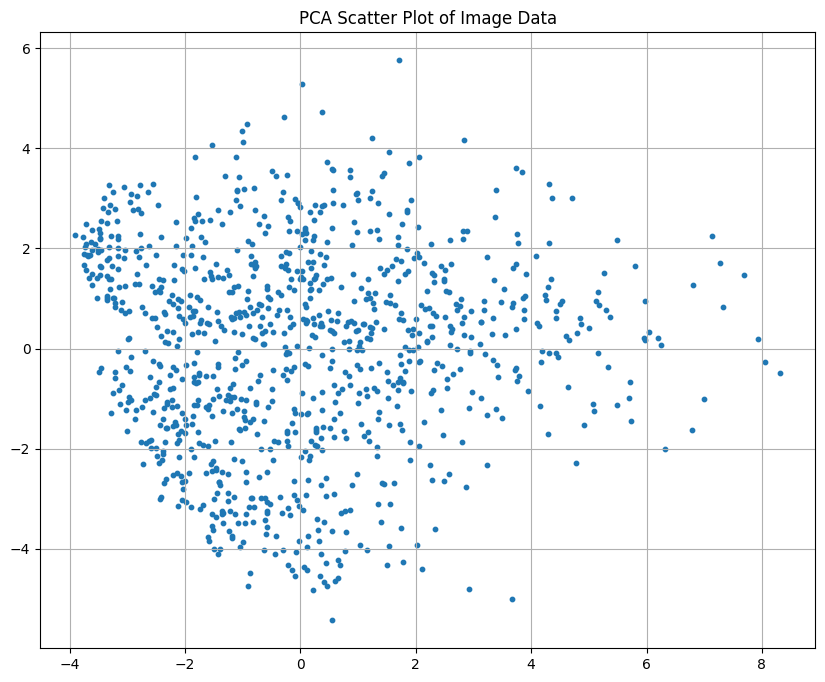

In [56]:

data = pd.read_csv('/kaggle/input/digit-clustering/data.csv')

# Extract features (pixel values) and labels (ID)
X = data.drop('ID', axis=1)

labels = data['ID']
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler 
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(X)
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.945)
X_pca = pca.fit_transform(scaled_data)

# Plot the reduced-dimensional data
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
plt.title('PCA Scatter Plot of Image Data')
plt.grid(True)
plt.show()

In [57]:
# Model Build Kmeans PCA=0.945 , score=0.35222
from sklearn.cluster import KMeans
kmeansmodel = KMeans(n_clusters=9, init='k-means++', random_state=200, n_init='auto') 
y_kmeans = kmeansmodel.fit_predict(X_pca)
y_kmeans

array([5, 2, 5, 7, 2, 7, 1, 4, 4, 4, 6, 3, 5, 4, 4, 5, 4, 2, 3, 4, 6, 8,
       4, 2, 4, 4, 8, 3, 3, 1, 6, 1, 7, 3, 8, 5, 4, 5, 5, 7, 4, 5, 7, 1,
       5, 8, 5, 1, 3, 7, 1, 4, 5, 1, 2, 5, 5, 4, 3, 5, 5, 6, 7, 2, 8, 5,
       7, 4, 5, 8, 6, 1, 0, 0, 5, 7, 1, 5, 7, 5, 5, 7, 6, 3, 5, 1, 3, 5,
       1, 7, 4, 8, 1, 8, 7, 3, 5, 0, 2, 4, 3, 5, 3, 1, 7, 6, 6, 4, 2, 8,
       2, 8, 0, 1, 2, 7, 3, 6, 5, 4, 7, 3, 7, 7, 6, 8, 3, 8, 8, 2, 7, 4,
       6, 8, 5, 5, 1, 4, 1, 4, 5, 2, 5, 7, 5, 7, 4, 6, 7, 2, 4, 6, 5, 2,
       6, 4, 3, 2, 1, 0, 8, 1, 6, 7, 5, 1, 5, 4, 7, 0, 6, 1, 6, 1, 6, 1,
       4, 6, 0, 7, 3, 4, 5, 2, 3, 5, 6, 7, 2, 7, 5, 8, 1, 4, 8, 2, 4, 1,
       4, 0, 2, 8, 8, 2, 2, 7, 3, 0, 3, 5, 1, 1, 4, 1, 4, 7, 5, 8, 5, 4,
       6, 5, 5, 1, 5, 4, 1, 8, 6, 7, 4, 7, 4, 5, 5, 8, 4, 7, 1, 0, 0, 0,
       3, 6, 5, 6, 1, 5, 2, 5, 7, 8, 0, 4, 1, 5, 5, 5, 7, 3, 2, 0, 1, 4,
       2, 8, 8, 2, 4, 7, 8, 5, 2, 2, 1, 0, 2, 7, 0, 8, 1, 5, 8, 1, 8, 2,
       2, 5, 2, 8, 6, 7, 2, 1, 5, 5, 3, 4, 2, 7, 6,

Cluster centroids:
[[ 1.39923234e+00  1.02787530e+00 -1.55505656e+00 ...  7.15133529e-04
   1.14567065e-02 -9.20804522e-05]
 [-1.68316761e+00 -1.61527877e+00  1.44663054e+00 ...  1.52759151e-02
   1.39862002e-03  8.44462006e-03]
 [ 4.28990515e+00  1.57518008e-01  1.59603425e-01 ...  6.23430149e-03
   5.50138112e-03  6.11338797e-03]
 ...
 [-3.19632345e-01  6.50886244e-01 -1.51143042e+00 ...  3.05984567e-03
   1.19979355e-02  3.47507312e-03]
 [ 5.22924481e-01 -2.45778020e+00  7.80082367e-01 ...  1.28789634e-02
  -1.43272293e-02  2.08494933e-03]
 [ 9.95836011e-01  1.59629896e-01 -1.61421827e+00 ... -2.21556633e-02
  -3.88455034e-03 -1.14553551e-02]]


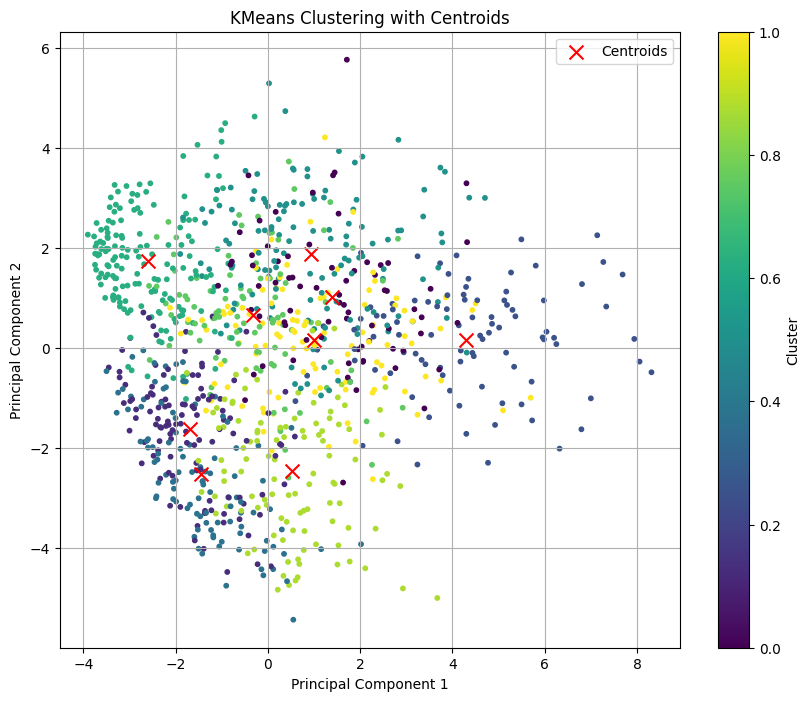

In [58]:
# Get cluster centroids
centroids = kmeansmodel.cluster_centers_
print("Cluster centroids:")
print(centroids)

# Get the size of each cluster
'''cluster_sizes = Counter(kmeansmodel.labels_)
print("Cluster sizes:")
print(cluster_sizes)'''
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.colorbar(label='Cluster')
plt.title('KMeans Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
# Save the DataFrame to a CSV file
labels_kmeans={'labels':y_kmeans}
predictions_df =pd.DataFrame(labels_kmeans,index=ID)
predictions_df.to_csv('k-mean_predictions.csv', index=True)
print("K-means predictions:")
predictions_df

K-means predictions:


,labels
ID,
1,5
2,2
3,5
4,7
5,2
...,...
995,2
996,0
997,5


In [60]:
# Model Build hirc =>0.553 , PCA=0.945
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=9,linkage='ward')
hier_labels = hierarchical_cluster.fit_predict(X_pca)
hier_labels

array([4, 0, 4, 2, 0, 0, 5, 7, 7, 7, 6, 8, 4, 7, 7, 4, 1, 0, 8, 7, 6, 3,
       1, 0, 1, 7, 3, 8, 8, 5, 6, 2, 2, 8, 1, 4, 6, 4, 4, 2, 6, 4, 2, 1,
       1, 3, 6, 5, 8, 2, 5, 7, 4, 2, 0, 1, 1, 7, 8, 4, 6, 4, 6, 0, 3, 7,
       2, 7, 4, 0, 7, 5, 2, 1, 3, 2, 5, 4, 2, 4, 6, 2, 6, 6, 1, 5, 8, 6,
       5, 2, 7, 3, 5, 3, 1, 8, 4, 1, 0, 7, 2, 1, 8, 5, 6, 6, 6, 7, 0, 3,
       0, 0, 7, 2, 0, 2, 5, 6, 4, 7, 2, 8, 2, 3, 4, 7, 8, 3, 3, 0, 2, 6,
       1, 3, 4, 6, 5, 7, 5, 6, 4, 0, 7, 2, 6, 2, 0, 6, 2, 0, 7, 6, 4, 0,
       6, 7, 8, 0, 5, 2, 3, 6, 6, 2, 3, 5, 6, 7, 2, 1, 6, 6, 6, 5, 6, 6,
       7, 6, 7, 7, 6, 7, 4, 2, 8, 4, 6, 2, 0, 2, 6, 6, 5, 0, 6, 0, 0, 6,
       7, 1, 0, 3, 3, 0, 0, 2, 5, 1, 8, 4, 5, 5, 7, 5, 6, 2, 3, 3, 6, 6,
       6, 4, 6, 5, 4, 7, 5, 3, 7, 2, 7, 2, 7, 1, 7, 1, 1, 5, 2, 1, 1, 1,
       8, 3, 6, 6, 6, 1, 0, 4, 2, 3, 2, 7, 5, 4, 4, 4, 2, 5, 0, 1, 5, 1,
       0, 3, 3, 0, 6, 2, 3, 1, 0, 0, 5, 1, 0, 2, 1, 3, 5, 4, 3, 5, 7, 0,
       0, 1, 0, 3, 6, 6, 0, 1, 1, 4, 8, 7, 1, 2, 6,

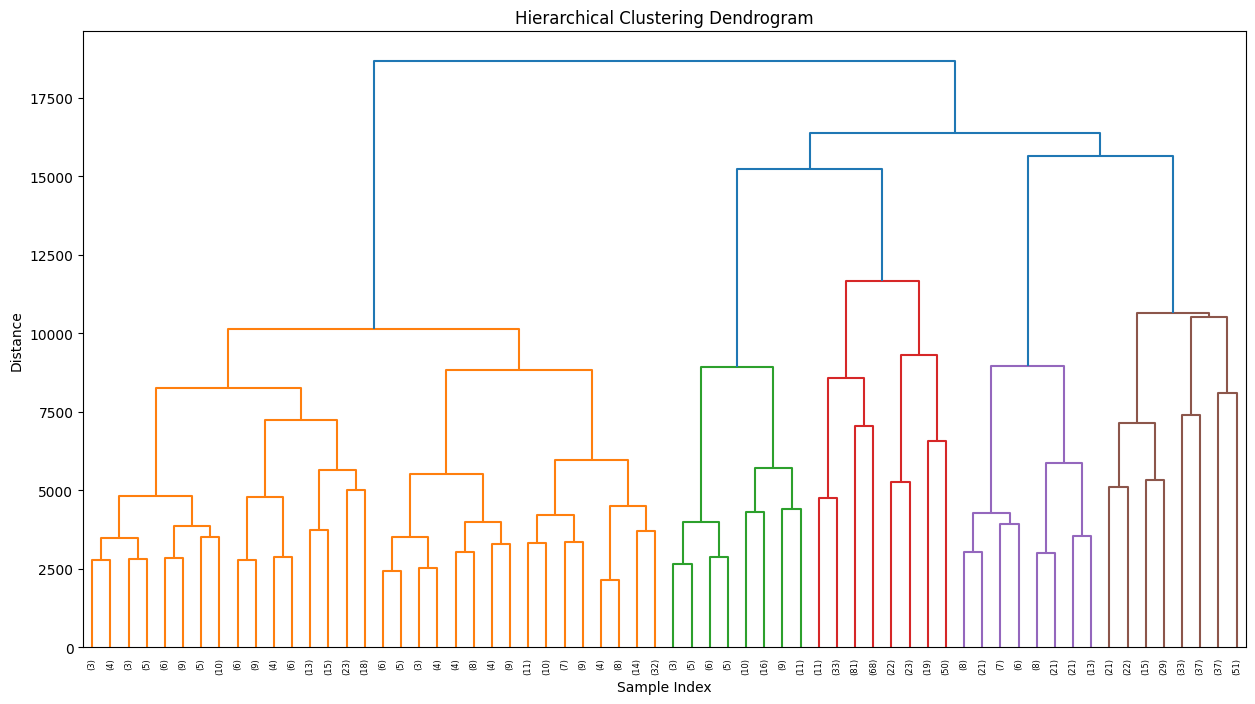

In [61]:
#visualize Hierarchical Model
from scipy.cluster.hierarchy import linkage, dendrogram


# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [62]:
#SAVE CSV PREDICTIONS
hier_labels={"labels":hier_labels}
submithier=pd.DataFrame(hier_labels,index=ID)
submithier_df.to_csv('predictionshier.csv', index=True)
print("Hirc Pridections:")
submithier_df

Hirc Pridections:


,labels
ID,
1,4
2,0
3,4
4,2
5,0
...,...
995,1
996,1
997,6


In [63]:
#Build Birch Model | score same as hierarchical 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import Birch


from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("/kaggle/input/digit-clustering/data.csv")  


X = data.drop('ID', axis=1)

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.845)
X_pca = pca.fit_transform(scaled_data)

# Build Birch model score=0.5530
birch_model = Birch(n_clusters=9)  
birch_labels = birch_model.fit_predict(X_pca)

# Save Birch predictions
labels={'labels':birch_labels}
birch_predictions = pd.DataFrame(labels, index=ID)
birch_predictions.to_csv('birch_predictions.csv', index=True)
print("Birch Predictions:")
print(birch_predictions)





Birch Predictions:
     labels
ID         
1         2
2         0
3         2
4         1
5         0
..      ...
995       7
996       7
997       1
998       8
999       6

[999 rows x 1 columns]


In [64]:
# Build GMM model score=0.417
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("/kaggle/input/digit-clustering/data.csv")  


X = data.drop('ID', axis=1)

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.945)
X_pca = pca.fit_transform(scaled_data)

gmm_model = GaussianMixture(n_components=10, random_state=0,
                            covariance_type='spherical')  # Assuming 10 clusters
gmm_labels = gmm_model.fit_predict(X_pca)

# Save GMM predictions
labels_gmm={'labels':gmm_labels}
gmm_predictions = pd.DataFrame(labels_gmm, index=ID)
gmm_predictions.to_csv('gmm_predictions.csv', index=True)
print("GMM Predictions: ")
print(gmm_predictions)

GMM Predictions: 
     labels
ID         
1         1
2         2
3         4
4         3
5         2
..      ...
995       9
996       0
997       7
998       6
999       0

[999 rows x 1 columns]


In [65]:
#Try to use Proximity matrix with Hierarchical Model
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Load the data
data = pd.read_csv("/kaggle/input/digit-clustering/data.csv")  # Replace "your_dataset.csv" with the path to your dataset

# Separate features and labels
X = data.drop('ID', axis=1)

# Compute the pairwise distance matrix
proximity_matrix = pairwise_distances(X_pca, metric='euclidean')

# Define the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=8, affinity='precomputed', linkage='average')

# Fit the model
cluster_labels = agg_clustering.fit_predict(proximity_matrix)

# Save the predictions to a CSV file
labels={'labels':cluster_labels}
cluster_predictions = pd.DataFrame(labels, index=ID)
cluster_predictions.to_csv('HIER_Prox_predictions.csv', index=True)
print("Proximity Labels: ")
print(cluster_predictions)

Proximity Labels: 
     labels
ID         
1         3
2         4
3         3
4         3
5         4
..      ...
995       3
996       3
997       3
998       3
999       3

[999 rows x 1 columns]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [66]:
#Another way to use Poxemity matrix but all the labels are zeros (: 
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from queue import PriorityQueue
# Load the data
data = pd.read_csv("/kaggle/input/digit-clustering/data.csv")  # Replace "your_dataset.csv" with the path to your dataset

# Separate features
X = data.drop('ID', axis=1)

# Compute the pairwise distance matrix
proximity_matrix = pairwise_distances(X, metric='euclidean')

# Initialize clusters, each data point is initially a cluster
num_samples = len(X)
clusters = [[i] for i in range(num_samples)]

# Initialize priority queue to store distances and corresponding cluster pairs
pq = PriorityQueue()

# Compute the initial pairwise distances and populate the priority queue
for i in range(len(clusters)):
    for j in range(i + 1, len(clusters)):
        distance = np.min(proximity_matrix[np.ix_(clusters[i], clusters[j])])
        pq.put((distance, (i, j)))

# Merge clusters until only a single cluster remains
while len(clusters) > 1:
    # Find the closest clusters
    min_distance, (i, j) = pq.get()

    # Merge the two closest clusters
    clusters[i].extend(clusters[j])
    del clusters[j]

    # Update the proximity matrix
    new_cluster_indices = clusters[i]
    if new_cluster_indices:
        min_distances = np.min(proximity_matrix[np.ix_(new_cluster_indices, new_cluster_indices)], axis=0)
        proximity_matrix[:, new_cluster_indices] = np.minimum(proximity_matrix[:, new_cluster_indices], min_distances)
        proximity_matrix[new_cluster_indices, :] = np.minimum(proximity_matrix[new_cluster_indices, :], np.expand_dims(min_distances, axis=1))

    # Update the priority queue with distances to the new merged cluster
    for k in range(len(clusters)):
        if k != i:
            distance = np.min(proximity_matrix[np.ix_(clusters[i], clusters[k])])
            pq.put((distance, (min(i, k), max(i, k))))

# Assign cluster IDs to each data point
cluster_labels = np.zeros(num_samples)
for i, cluster in enumerate(clusters):
    cluster_labels[cluster] = i

    
labels={'labels':cluster_labels}
cluster_predictions = pd.DataFrame(labels, index=ID)
cluster_predictions.to_csv('HIER_Prox_predictions.csv', index=True)
print("HIER_Prox_predictions: ")
print(cluster_predictions)

HIER_Prox_predictions: 
     labels
ID         
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
..      ...
995     0.0
996     0.0
997     0.0
998     0.0
999     0.0

[999 rows x 1 columns]


In [67]:
# A failed trial of using Deep learning with KERAS library  score=0.2217
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input

# Step 1: Load the data
data = pd.read_csv("/kaggle/input/digit-clustering/data.csv")

# Step 2: Extract pixel values as numpy array and convert to float32
pixels = data.iloc[:, 1:].values.astype(np.float32)

# Step 3: Normalize pixel values
pixels /= 255.0

# Step 4: Reshape the data
X = pixels.reshape(-1, 28, 28, 1)  # Assuming the pixel columns start from the second column

# Step 5: Define the feature extraction model
input_shape = (28, 28, 1)
input_layer = Input(shape=input_shape)
flatten_layer = Flatten()(input_layer)
dense_layer1 = Dense(128, activation='relu')(flatten_layer)  # Adjust the number of units as needed
dense_layer2 = Dense(64, activation='relu')(dense_layer1)    # Adjust the number of units as needed

# Define model
feature_model = Model(inputs=input_layer, outputs=dense_layer2)

# Step 6: Extract features using the model
X_features = feature_model.predict(X)

# Step 7: Define the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=8)

# Step 8: Fit the model
cluster_labels = agg_clustering.fit_predict(X_features)

# Step 9: Save predictions to a CSV file
cluster_predictions = pd.DataFrame({'labels': cluster_labels}, index=data.index)
cluster_predictions.to_csv('KERAS_predictions.csv')
print("KERAS Predictions: ")
print(cluster_predictions)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
KERAS Predictions: 
     labels
0         6
1         7
2         4
3         4
4         7
..      ...
994       1
995       3
996       4
997       2
998       3

[999 rows x 1 columns]
